/Users/mehdisoleimanifar/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/mehdisoleimanifar/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5404: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/mehdisoleimanifar/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5405: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/mehdisoleimanifar/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5408: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/mehdisoleimanifar/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5410: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


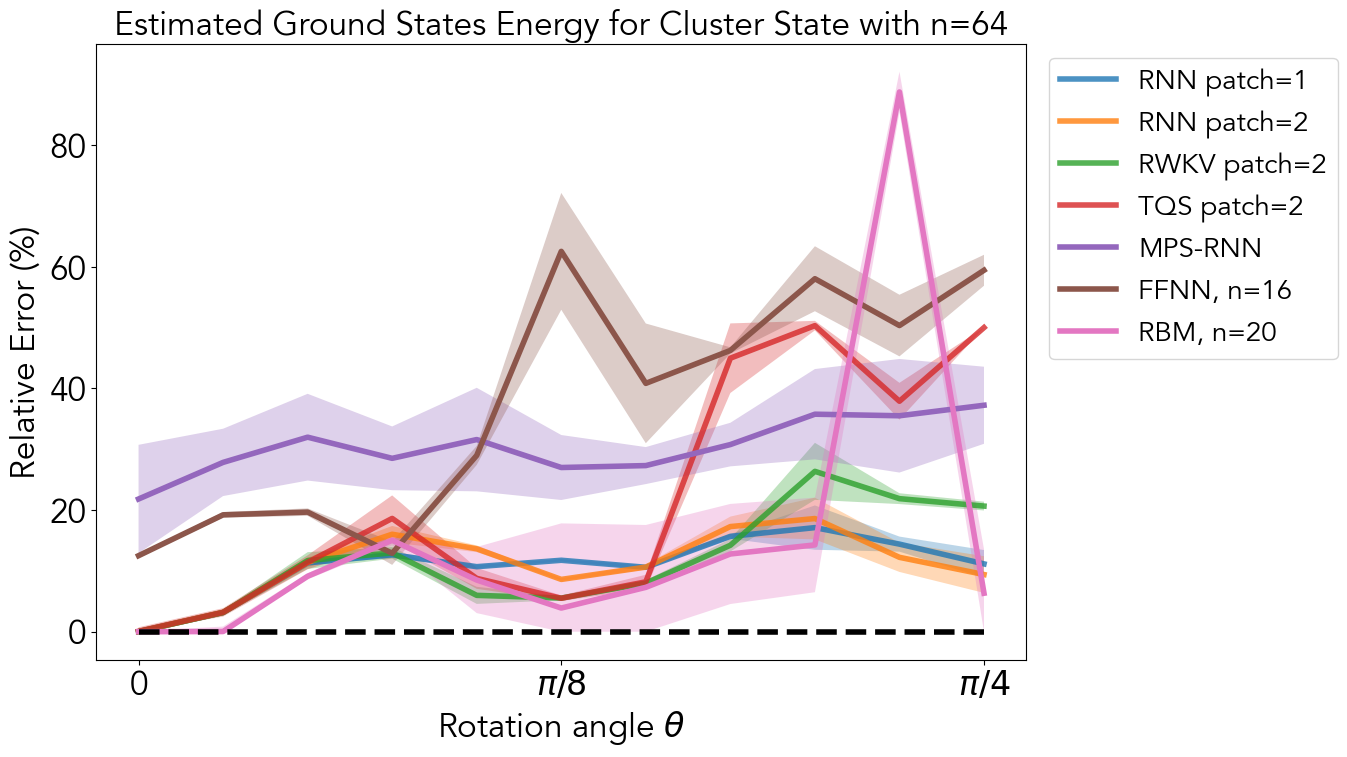

In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt

# Function to plot data
def plot_data(font_size, title_size, label_size, legend_size, tick_size, line_thickness):
    plt.rcParams.update({'font.size': font_size, 'font.family': 'avenir'})
    plt.figure(figsize=(12, 8))

    # Load and plot RNN data
    E1 = np.load("../patched_rnn_1des/result/meanE_L64_units64_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
    E1 = E1.reshape((11, -1))[:, :6000].ravel()
    E1_var = np.load("../patched_rnn_1des/result/varE_L64_units64_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
    E2_rnn = np.load("../patched_rnn_1des/result/meanE_L32_patch2_units32_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
    E2_var_rnn = np.load("../patched_rnn_1des/result/varE_L32_patch2_units32_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
    E4_rnn = np.load("../patched_rnn_1des/result/meanE_L16_patch4_units32_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
    E4_var_rnn = np.load("../patched_rnn_1des/result/varE_L16_patch4_units32_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")

    lastE1 = E1.reshape(11, -1)[:, -1]
    lastE2_rnn = E2_rnn.reshape(11, -1)[:, -1]
    lastE4_rnn = E4_rnn.reshape(11, -1)[:, -1]
    last_E1var = np.sqrt(E1_var.reshape(11, -1)[:, -1])
    last_E2var_rnn = np.sqrt(E2_var_rnn.reshape(11, -1)[:, -1])
    last_E4var_rnn = np.sqrt(E4_var_rnn.reshape(11, -1)[:, -1])

    # Calculate relative error
    relative_error1 = (lastE1 + 64) / 64 * 100
    relative_error2_rnn = (lastE2_rnn + 64) / 64 * 100
    relative_error4_rnn = (lastE4_rnn + 64) / 64 * 100
    relative_error1_var = last_E1var / 64 * 100
    relative_error2_var_rnn = last_E2var_rnn / 64 * 100
    relative_error4_var_rnn = last_E4var_rnn / 64 * 100

    # Reverse x-axis
    x_values = np.linspace(np.pi/4, 0, 11)

    plt.plot(x_values, relative_error1, label="RNN patch=1", alpha=0.8, linewidth=line_thickness)
    plt.fill_between(
        x_values,
        np.maximum(relative_error1 - relative_error1_var, 0),
        relative_error1 + relative_error1_var,
        alpha=0.3
    )
    plt.plot(x_values, relative_error2_rnn, label="RNN patch=2", alpha=0.8, linewidth=line_thickness)
    plt.fill_between(
        x_values,
        np.maximum(relative_error2_rnn - relative_error2_var_rnn, 0),
        relative_error2_rnn + relative_error2_var_rnn,
        alpha=0.3
    )

    # Load and plot RWKV data
    E2_rwkv = np.load("../rwkv/patched_rwkv_1des/result/meanE_L32patch_2_emb_size16_hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
    E2_var_rwkv = np.load("../rwkv/patched_rwkv_1des/result/varE_L32patch_2_emb_size16hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
    E4_rwkv = np.load("../rwkv/patched_rwkv_1des/result/meanE_L16patch_4_emb_size16_hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
    E4_var_rwkv = np.load("../rwkv/patched_rwkv_1des/result/varE_L16patch_4_emb_size16hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
    lastE2_rwkv = E2_rwkv.reshape(11, -1)[:, -1]
    lastE4_rwkv = E4_rwkv.reshape(11, -1)[:, -1]
    last_var2_rwkv = np.sqrt(E2_var_rwkv.reshape(11, -1)[:, -1])
    last_var4_rwkv = np.sqrt(E4_var_rwkv.reshape(11, -1)[:, -1])

    # Calculate relative error
    relative_error2_rwkv = (lastE2_rwkv + 64) / 64 * 100
    relative_error4_rwkv = (lastE4_rwkv + 64) / 64 * 100
    relative_error2_var_rwkv = last_var2_rwkv / 64 * 100
    relative_error4_var_rwkv = last_var4_rwkv / 64 * 100

    plt.plot(x_values, relative_error2_rwkv, label="RWKV patch=2", alpha=0.8, linewidth=line_thickness)
    plt.fill_between(
        x_values,
        np.maximum(relative_error2_rwkv - relative_error2_var_rwkv, 0),
        relative_error2_rwkv + relative_error2_var_rwkv,
        alpha=0.3
    )

    # Load and plot TQS data
    E2_tqs = np.load("../TQS_1des/result/meanE_L32_patch2_units64_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
    E2_var_tqs = np.load("../TQS_1des/result/varE_L32_patch2_units64_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
    E4_tqs = np.load("../TQS_1des/result/meanE_L16_patch4_units64_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
    E4_var_tqs = np.load("../TQS_1des/result/varE_L16_patch4_units64_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
    lastE2_tqs = E2_tqs.reshape(11, -1)[:, -1]
    lastE4_tqs = E4_tqs.reshape(11, -1)[:, -1]
    last_var2_tqs = np.sqrt(E2_var_tqs.reshape(11, -1)[:, -1])
    last_var4_tqs = np.sqrt(E4_var_tqs.reshape(11, -1)[:, -1])

    # Calculate relative error
    relative_error2_tqs = (lastE2_tqs + 64) / 64 * 100
    relative_error4_tqs = (lastE4_tqs + 64) / 64 * 100
    relative_error2_var_tqs = last_var2_tqs / 64 * 100
    relative_error4_var_tqs = last_var4_tqs / 64 * 100

    plt.plot(x_values, relative_error2_tqs, label="TQS patch=2", alpha=0.8, linewidth=line_thickness)
    plt.fill_between(
        x_values,
        np.maximum(relative_error2_tqs - relative_error2_var_tqs, 0),
        relative_error2_tqs + relative_error2_var_tqs,
        alpha=0.3
    )

    # Load and plot MPS-RNN data
    E_mps = np.load("../MPS_RNN/result/meanE_L64_bonddim16_cmi_pattern_no_decayrotationTrueangle1.5707964_seed3.npy")
    varE_mps = np.load("../MPS_RNN/result/varE_L64_bonddim16_cmi_pattern_no_decayrotationTrueangle1.5707964_seed3.npy")
    minE_mps = E_mps.reshape(11, -1)[:, 4000]
    minE_var_mps = np.sqrt(varE_mps).reshape(11, -1)[:, 4000]

    # Calculate relative error
    relative_error_mps = (minE_mps + 64) / 64 * 100
    relative_error_var_mps = minE_var_mps / 64 * 100

    plt.plot(x_values, relative_error_mps, label="MPS-RNN", linewidth=line_thickness)
    plt.fill_between(
        x_values,
        np.maximum(relative_error_mps - relative_error_var_mps, 0),
        relative_error_mps + relative_error_var_mps,
        alpha=0.3
    )

    # Add FFNN data
    iters_ffnn = []
    E_ffnn = []
    E_var_ffnn = []
    a = 11
    for i in range(a):
        data_ffnn = json.load(open("../netket_1des/FFNN/FFNN" + str(i) + ".log"))
        iters = data_ffnn['Energy']['iters']
        iters_ffnn.append(iters)
        energy = data_ffnn['Energy']['Mean']['real']
        E_ffnn.append(energy)
        E_var_ffnn.append(data_ffnn['Energy']['Variance'])

    lastE_ffnn = np.array(E_ffnn).reshape(11, -1)[:, -1]
    lastE_var_ffnn = np.sqrt(np.array(E_var_ffnn).reshape(11, -1)[:, -1])

    # Calculate relative error for FFNN data
    relative_error_ffnn = (lastE_ffnn + 16) / 16 * 100
    relative_error_ffnn_var = lastE_var_ffnn / 16 * 100

    plt.plot(x_values, relative_error_ffnn, label="FFNN, n=16", linewidth=line_thickness)
    plt.fill_between(
        x_values,
        np.maximum(relative_error_ffnn - relative_error_ffnn_var, 0),
        relative_error_ffnn + relative_error_ffnn_var,
        alpha=0.3
    )

    # Add RBM data
    iters_rbm = []
    E_rbm = []
    E_var_rbm = []
    a = 11
    for i in range(a):
        data_rbm = json.load(open("../netket_1des/RBM" + str(i) + "L=20" + ".log"))
        iters = data_rbm['Energy']['iters']
        iters_rbm.append(iters)
        energy = data_rbm['Energy']['Mean']['real']
        E_rbm.append(energy)
        E_var_rbm.append(data_rbm['Energy']['Variance'])

    lastE_rbm = np.array(E_rbm).reshape(11, -1)[:, -1]
    lastE_var_rbm = np.sqrt(np.array(E_var_rbm).reshape(11, -1)[:, -1])

    # Calculate relative error for RBM data
    relative_error_rbm = (lastE_rbm + 20) / 20 * 100
    relative_error_rbm_var = lastE_var_rbm / 20 * 100

    plt.plot(x_values, relative_error_rbm, label="RBM, n=20", linewidth=line_thickness)
    plt.fill_between(
        x_values,
        np.maximum(relative_error_rbm - relative_error_rbm_var, 0),
        relative_error_rbm + relative_error_rbm_var,
        alpha=0.3
    )

    # Finalize plot
    plt.title("Estimated Ground States Energy for Cluster State with n=64", fontsize=title_size)
    plt.xlabel(r"Rotation angle $\theta$", fontsize=label_size)
    plt.ylabel("Relative Error (%)", fontsize=label_size)
    # Set specific x-ticks for the axis
    selected_ticks = [0, np.pi / 8, np.pi / 4]
    selected_labels = ['0', '$\\pi/8$', '$\\pi/4$']

    plt.xticks(ticks=selected_ticks, labels=selected_labels, fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.plot([np.pi / 4, 0], [0, 0], 'k--', linewidth=line_thickness)  # Baseline for zero relative error
    plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1), fontsize=legend_size)
    plt.savefig("ClusterStateOptimization.pdf", bbox_inches='tight')
    plt.show()

# Plot with specified font sizes and line thickness
plot_data(font_size=24, title_size=24, label_size=24, legend_size=20, tick_size=24, line_thickness=4)
